The min and max value before normalization {'pregs': [0, 13], 'plas': [44, 199], 'pres': [38, 106], 'skin': [0, 63], 'test': [0.0, 318.0], 'BMI': [18.2, 50.0], 'pedi': [0.078, 1.1909999999999998], 'Age': [21, 66]}

The min and max value after normalization {'pregs': [5.0, 12.0], 'plas': [5.0, 12.0], 'pres': [5.0, 12.0], 'skin': [5.0, 12.0], 'test': [5.0, 12.0], 'BMI': [5.0, 12.0], 'pedi': [5.0, 12.0], 'Age': [5.0, 12.0]}

The mean before standardization {'pregs': 3.7825520833333335, 'plas': 121.65625, 'pres': 72.19661458333333, 'skin': 20.4375, 'test': 60.919270833333336, 'BMI': 32.19895833333331, 'pedi': 0.4276673177083332, 'Age': 32.760416666666664}

The standard deviation before standardization {'pregs': 3.270644231185024, 'plas': 30.43828582241517, 'pres': 11.146722742501327, 'skin': 15.698553733035284, 'test': 77.63566579465224, 'BMI': 6.410557943798963, 'pedi': 0.2451623740187653, 'Age': 11.055384847014682}

The mean after standardization {'pregs': -0.0, 'plas': -0.0, 'pres': 0.0

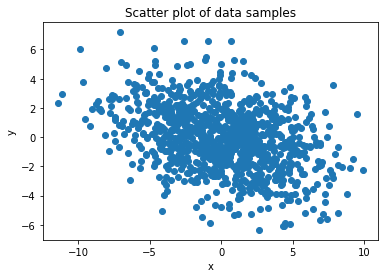

The eigen values [14.  4.]
The eigen vectors [[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]]


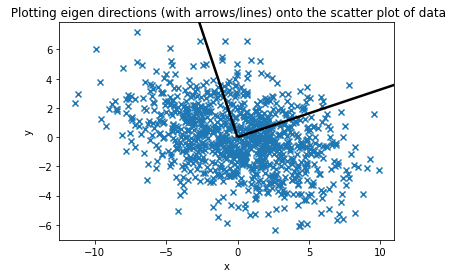

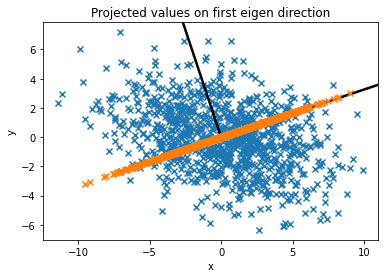

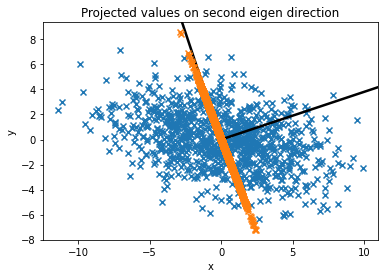

error between new and original matrix after reconstruction 2.7100064232968842e-14
           y1        y2
0    1.637099 -0.460884
1   -1.571361  0.001477
2    0.173632 -1.559259
3   -1.843546  0.643192
4   -0.354060  2.519463
..        ...       ...
763  2.392283 -0.336139
764 -0.365180  0.383912
765 -0.345638 -0.074010
766 -0.748263 -1.249422
767 -1.410288  0.431745

[768 rows x 2 columns]
variances 1.992 1.853
eigen values 1.992 1.853


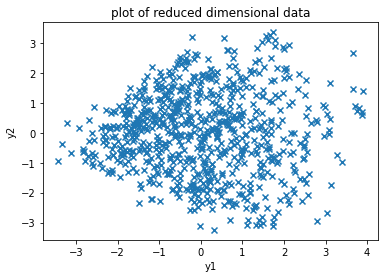

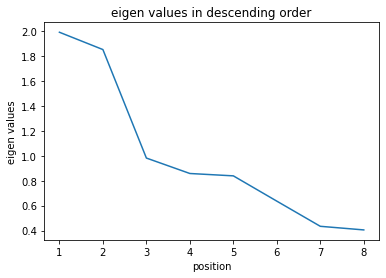

covariance matrix for value of l = 2        a1     a2
a1  1.992  0.000
a2  0.000  1.853
covariance matrix for value of l = 3        a1     a2     a3
a1  1.992 -0.000  0.000
a2 -0.000  1.853 -0.000
a3  0.000 -0.000  0.982
covariance matrix for value of l = 4        a1     a2     a3     a4
a1  1.992  0.000  0.000  0.000
a2  0.000  1.853  0.000  0.000
a3  0.000  0.000  0.982 -0.000
a4  0.000  0.000 -0.000  0.858
covariance matrix for value of l = 5        a1     a2     a3     a4     a5
a1  1.992  0.000 -0.000 -0.000  0.000
a2  0.000  1.853 -0.000 -0.000  0.000
a3 -0.000 -0.000  0.982  0.000  0.000
a4 -0.000 -0.000  0.000  0.858  0.000
a5  0.000  0.000  0.000  0.000  0.839
covariance matrix for value of l = 6        a1     a2     a3     a4     a5     a6
a1  1.992 -0.000  0.000 -0.000 -0.000 -0.000
a2 -0.000  1.853 -0.000  0.000 -0.000  0.000
a3  0.000 -0.000  0.982  0.000  0.000 -0.000
a4 -0.000  0.000  0.000  0.858  0.000  0.000
a5 -0.000 -0.000  0.000  0.000  0.839  0.000
a6 -0.000  0.00

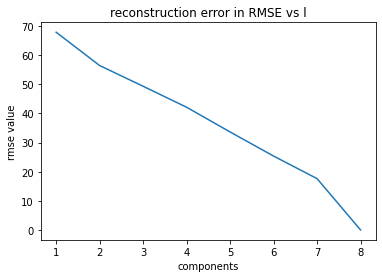

covariance matrix of ori-data        pregs   plas   pres   skin   test    BMI   pedi    Age
pregs  1.000  0.118  0.209 -0.097 -0.108  0.028  0.005  0.561
plas   0.118  1.000  0.205  0.060  0.180  0.228  0.082  0.274
pres   0.209  0.205  1.000  0.026 -0.051  0.272  0.022  0.326
skin  -0.097  0.060  0.026  1.000  0.473  0.374  0.153 -0.101
test  -0.108  0.180 -0.051  0.473  1.000  0.172  0.199 -0.074
BMI    0.028  0.228  0.272  0.374  0.172  1.000  0.124  0.078
pedi   0.005  0.082  0.022  0.153  0.199  0.124  1.000  0.036
Age    0.561  0.274  0.326 -0.101 -0.074  0.078  0.036  1.000


In [72]:
#question-1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statistics as st

data = pd.read_csv("pima-indians-diabetes.csv")
pf=data.copy()
pf.drop('class', inplace=True, axis=1)

for col in pf.columns:
    q1 = np.percentile(pf[col], 25, interpolation='midpoint')  
    q3 = np.percentile(pf[col], 75, interpolation='midpoint')  
    iqr = q3 - q1  
    upperbound = q3 + (1.5 * iqr)  
    lowerbound = q1 - (1.5 * iqr)
    median = pf[col].median() 
    pf.loc[pf[col] < lowerbound, col] = median
    pf.loc[pf[col] > upperbound, col] = median
#part a
# min-max normalization
nordata=pf.copy()
before = {}
after = {}
for col in nordata.columns:
    newLowerBound=5
    newUpperBound=12
    mini = np.min(nordata[col])
    maxi = np.max(nordata[col])
    before[col] = [mini, maxi]
    ranges = maxi - mini
    newRange = newUpperBound - newLowerBound
    old = nordata[col].values.tolist()
    new = []
    
    for value in old:
        y=((value - mini) / ranges) * newRange + newLowerBound
        new.append(y)

    nordata[col] = nordata[col].replace(old, new)
    after[col] = [min(nordata[col]), max(nordata[col])]
print("The min and max value before normalization",before)
print()
print("The min and max value after normalization",after)
print()
#part b
#Standardization
beforemean = {}
beforestd = {}
aftermean = {}
afterstd = {}
for col in pf.columns:
    mean = pf[col].mean()
    std = pf[col].std()
    beforemean[col] = mean
    beforestd[col] = std
    older = pf[col].values.tolist()
    newer = []
    for value in older:
        y= (value - mean) / std
        newer.append(y)

    pf[col] = pf[col].replace(older, newer)
    aftermean[col] =round(pf[col].mean(), 3)
    afterstd[col] = round(pf[col].std(), 3)

print("The mean before standardization", beforemean)
print()
print("The standard deviation before standardization", beforestd)
print()
print("The mean after standardization", aftermean)
print()
print("The standard deviation after standardization", afterstd)
print()
#question2
meand = [0, 0]
cov = [[13, -3], [-3, 5]]
data = np.random.multivariate_normal(meand, cov, 1000)
ff= pd.DataFrame(data, columns=['x', 'y'])

# part a
plt.scatter(ff['x'], ff['y'])
plt.title("Scatter plot of data samples")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# part b
s, t = np.linalg.eig(cov)
print("The eigen values", s)
print("The eigen vectors", t)
# plotting
plt.scatter(ff['x'], ff['y'], marker='x')
plt.quiver(t[0][0], t[0][1], scale=1)
plt.quiver(t[1][0], t[1][1], scale=1)
plt.title(' Plotting eigen directions (with arrows/lines) onto the scatter plot of data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# part c
#direction of first eigen
unitvector1= [t[0][0] / ((t[0][0]) ** 2 + (t[0][1]) ** 2) ** (1 / 2),
         t[0][1] / ((t[0][0]) ** 2 + (t[0][1]) ** 2) ** (1 / 2)] 
sum1 = ff['x'] * unitvector1[0] + ff['y'] * unitvector1[1]
ff['sum1'] = sum1
# Projecting the data on first eigen direction
e1x = ff['sum1'] * unitvector1[0]
e1y = ff['sum1'] * unitvector1[1]
e1x = [round(num, 3) for num in e1x.tolist()]
e1y = [round(num, 3) for num in e1y.tolist()]
#scatter plots superimposed with eigen direction
plt.scatter(ff['x'], ff['y'], marker='x')
plt.quiver(t[0][0], t[0][1], scale=1)
plt.quiver(t[1][0], t[1][1], scale=1)
plt.scatter(e1x, e1y, marker='x')
plt.title('Projected values on first eigen direction')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# direction of second eigen
unitvector2 = [t[1][0] / ((t[1][0]) ** 2 + (t[1][1]) ** 2) ** (1 / 2),
         t[1][1] / ((t[1][0]) ** 2 + (t[1][1]) ** 2) ** (1 / 2)]  
sum2 = ff['x'] * unitvector2[0] + ff['y'] * unitvector2[1]
ff['sum2'] = sum2
# Projecting the data on to the second eigen direction
e2x = ff['sum2'] * unitvector2[0]
e2y = ff['sum2'] * unitvector2[1]
e2x = [round(num, 3) for num in e2x.tolist()]
e2y = [round(num, 3) for num in e2y.tolist()]
#scatter plots superimposed with eigen direction
plt.scatter(ff['x'], ff['y'], marker='x')
plt.quiver(t[0][0], t[0][1], scale=1)
plt.quiver(t[1][0], t[1][1], scale=1)
plt.scatter(e2x, e2y, marker='x')
plt.title('Projected values on second eigen direction')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# part d
# reconstruction of sample data using both eigen vector
ff = ff.drop(['sum2', 'sum1'], axis=1)
PCa = PCA(n_components=2)
gg= PCa.inverse_transform(PCa.fit_transform(ff))
mse = np.linalg.norm((gg - ff), None)
print("error between new and original matrix after reconstruction", mse)
# question 3

corrematrix = pf.corr()
p, s = np.linalg.eig(corrematrix.to_numpy())
eigen = {}
for i in range(len(p)):
    eigen[round(p[i], 3)] = [round(num, 3) for num in s[i]]
# sorting in descending order
sorteigen = sorted(eigen.items(), reverse=True)
eigenanaly = {}
for i in range(len(p)):
    eigenanaly[round(sorteigen[i][0], 3)] = [round(num, 3) for num in sorteigen[i][1]]
# part a
# reducing the multidimensional (d = 8) data into lower dimensions (l = 2)
PCa = PCA(n_components=2)
reduced = PCa.fit_transform(pf)
df= pd.DataFrame(reduced, columns=['y1', 'y2'])
print(df)
variance1 = st.variance(df['y1'].values.tolist())
variance2 = st.variance(df['y2'].values.tolist())
print("variances", round(variance1, 3), round(variance2, 3))
print("eigen values", round(sorteigen[0][0], 3), round(sorteigen[1][0], 3))
# plot of reduced dimensional data with l=2
plt.scatter(df['y1'], df['y2'], marker='x')
plt.title('plot of reduced dimensional data')
plt.xlabel('y1')
plt.ylabel('y2')
plt.show()
# part b
n = np.linspace(1, 8, 8)
plt.plot(n, eigenanaly.keys())
plt.title('eigen values in descending order')
plt.xlabel('position')
plt.ylabel('eigen values')
plt.show()
# part c
col = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8']
# calculating the  reconstruction error in terms of rmse considering the different values of l (=1, 2,3, ..., 8)
components = [1, 2, 3, 4, 5, 6, 7, 8]
RMSE = []
for n in components:
    PCa = PCA(n_components=n)
    reduced= PCa.fit_transform(pf)
    dfx= PCa.inverse_transform(PCa.fit_transform(pf))
    if n != 1:
        column = col[0:n]
        dfy= pd.DataFrame(data=reduced, columns=[column])
        covy = pd.DataFrame(dfy.cov().T.round(decimals=3))
        with pd.option_context('display.max_rows', None, 'display.max_columns', None):
            print("covariance matrix for value of l =", n, covy)

    rmse= np.linalg.norm((pf - dfx), None)
    RMSE.append(round(rmse, 3))

components = np.linspace(1, 8, 8)
plt.plot(components, RMSE)
plt.title('reconstruction error in RMSE vs l')
plt.xlabel('components')
plt.ylabel('rmse value')
plt.show()
# part d
# Compare the covariance matrix for the original data (8-dimensional) with that of the covariance 
#matrix for 8-dimensional representation obtained using PCA with l = 8.
covori= pd.DataFrame(pf.cov().T.round(decimals=3))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print("covariance matrix of ori-data", covori)
# covariance matrix of reconstructed data is already calculated in part c